# Demonstration of retrieving hydrophone data from Oceans 2.0  Web Services API and plotting a spectrogram

This notebook serves as a demonstration of downloading and manipulating hydrophone data from Ocean Networks Canada using the Oceans 2.0 web services API. The API client library documentation is here:

https://wiki.oceannetworks.ca/display/O2A/Oceans+2.0+API+Home

The first step is to install the ONC web services API client library for Python. The ONC Python client library contains a number of classes and functions that access the ONC data, through the Oceans 2.0 API.

The client library is not necessary to run web service calls using the core API methods described in the documentation; however, it wraps many of the API calls into convenient, code snippets.

## Install the ONC web service client library.

In [16]:
import sys
!{sys.executable} -m pip install onc

## Install some required packages for data analysis

In [12]:
from onc.onc import ONC # Ocean 2.0 client library

# These libraries are needed for .wav file reading and processing
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
!{sys.executable} -m pip install wavio
import wavio

## Download hydrophone wav files using dataProductDelivery web service

In [14]:
# Replace YOUR_TOKEN_HERE with your personal token obtained from the 'Web Services API' tab at https://data.oceannetworks.ca/Profile when logged in.
# onc = ONC('YOUR_TOKEN_HERE')   

# The following parameter settings specify the user access token, 
# whether to show information during the run,
# and the directory in which to store the data.

token = 'YOUR_TOKEN_HERE'
showInfo = True
outPath = "output"

# Create the object for subsequent calls
onc = ONC(token, showInfo, outPath)

# Define some parameters for the orderDataProducts API service call
locationCode = 'BACUS'                 # Location code for Barkley Canyon Upper Slope
deviceCategoryCode = 'HYDROPHONE'      # Hydrophone device category
dataProductCode = 'AD'                 # Audio data
extension = 'wav';                     # Wav File Format
dateFrom = '2015-01-01T00:00:00.000Z'
dateTo = '2015-01-01T00:10:00.000Z'
maxRetries = 100
downloadResultsOnly = False
includeMetadataFile = False

orders = onc.orderDataProduct( { 'locationCode' : locationCode,
                'deviceCategoryCode' : deviceCategoryCode,
                'dataProductCode' : dataProductCode,
                'extension' : extension,
                'dateFrom' : dateFrom,
                'dateTo' : dateTo,
                'dpo_hydrophoneDataDiversionMode' : 'All' },
                maxRetries, downloadResultsOnly, includeMetadataFile);

Requesting URL: https://data.oceannetworks.ca/api/dataProductDeliverylocationCode=BACUS&deviceCategoryCode=HYDROPHONE&dataProductCode=AD&extension=wav&dateFrom=2015-01-01T00%3A00%3A00.000Z&dateTo=2015-01-01T00%3A10%3A00.000Z&dpo_hydrophoneDataDiversionMode=All&method=request&token=febe4ee8-507b-48cd-bb6f-9c8fd86e5311
Web Service response time: 0.971 seconds
Request Id: 3202429
Estimated File Size: 35 MB
Estimated Processing Time: 10 s

   data product running...
   4 files generated for this data product
   complete

   Skipping "output/ICLISTENHF1251_20120901T000000.000Z-hydrophoneCalibration.txt": File already exists.
   Skipping "output/ICLISTENHF1251_20141231T235857.223Z.wav": File already exists.
   Skipping "output/ICLISTENHF1251_20150101T000357.223Z.wav": File already exists.
   Skipping "output/ICLISTENHF1251_20150101T000857.224Z.wav": File already exists.
Total run time: 13 seconds
Total download Time: 0.268 seconds
4 files (0 Bytes) downloaded


## Compute and plot the spectrogram

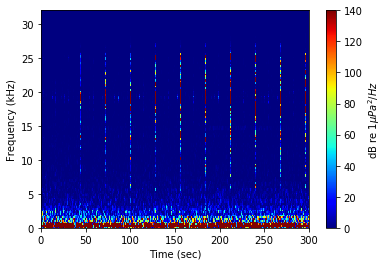

In [15]:
# Read in the wav file
wav = wavio.read('output/'+ 'ICLISTENHF1251_20141231T235857.223Z.wav')

# Get the sampling rate
Fs = wav.rate

# Compute the spectrogram
freqs, times, Sx = signal.spectrogram(wav.data[:,0], fs=Fs, window='hanning',
                                      scaling='density')

# Plot the results
plt.pcolormesh(times, freqs/1000, Sx, cmap='jet')
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (sec)')
cbar = plt.colorbar()
cbar.set_label('dB re 1$\mu Pa^2/Hz$')
plt.clim(0,140)